# Airline Price Prediction

### Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [5]:
data = pd.read_csv('Data_Train.csv')

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Basic concepts of data

- Shape
- Size
- Info
- Describe

In [11]:
data.shape

(10683, 11)

In [13]:
data.size

117513

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Finding the Null values

In [19]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
for index, nan in enumerate(data['Route'].isna().values):
    if nan == True : print(index)

9039


In [23]:
for index, nan in enumerate(data['Total_Stops'].isna().values):
    if nan == True : print(index)

9039


### Removing the Null values

In [25]:
data.drop([9039],inplace=True)
data.reset_index(inplace=True)

In [27]:
data.head()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
data.shape

(10682, 12)

### Removing the Index column

In [31]:
data.drop(['index'],axis=1,inplace=True)

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Changing to datetime format

In [35]:
def change_to_date(column):
    data[column] = pd.to_datetime(data[column],infer_datetime_format=True)

In [37]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_date(i)

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3246679500.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[column] = pd.to_datetime(data[column],infer_datetime_format=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3246679500.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[column] = pd.to_datetime(data[column],infer_datetime_format=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3246679500.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. 

In [39]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1 stop,No info,13302


In [41]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Seperating the datetime

In [43]:
data['Journey_date'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [45]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [47]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_date                int32
Journey_month               int32
dtype: object

In [49]:
def getting_hour(data,column):
    data[column+'_hr']=data[column].dt.hour
def getting_minute(data,column):
    data[column+'_min']=data[column].dt.minute
def drop_column(data,column):
    data.drop(column,axis=1,inplace=True)

In [51]:
getting_hour(data,'Dep_Time')
getting_minute(data,'Dep_Time')
getting_hour(data,'Arrival_Time')
getting_minute(data,'Arrival_Time')

In [53]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Getting the hour and minute from Duration collumn

In [55]:
duration = list(data['Duration'])

In [57]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [59]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [61]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [63]:
data['Duration'] = duration

In [65]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [67]:
def hour(i):
    return i.split(' ')[0][0:-1]
def minute(i):
    return i.split(' ')[1][0:-1]

In [69]:
data['Duration_hr'] = data['Duration'].apply(hour)
data['Duration_min'] = data['Duration'].apply(minute)

In [71]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [73]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Journey_date                 int32
Journey_month                int32
Dep_Time_hr                  int32
Dep_Time_min                 int32
Arrival_Time_hr              int32
Arrival_Time_min             int32
Duration_hr                 object
Duration_min                object
dtype: object

In [75]:
data['Duration_hr'] = data['Duration_hr'].astype(int)
data['Duration_min'] = data['Duration_min'].astype(int)

In [77]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Journey_date                 int32
Journey_month                int32
Dep_Time_hr                  int32
Dep_Time_min                 int32
Arrival_Time_hr              int32
Arrival_Time_min             int32
Duration_hr                  int32
Duration_min                 int32
dtype: object

### Checking the unique and Replacing the values

In [79]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [81]:
data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
data.head()

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\443659685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\443659685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-12-27 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-12-27 05:50:00,2024-12-27 13:15:00,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-12-27 09:25:00,2024-06-10 04:25:00,19h 0m,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2024-12-27 18:05:00,2024-12-27 23:30:00,5h 25m,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2024-12-27 16:50:00,2024-12-27 21:35:00,4h 45m,1,No info,13302,1,3,16,50,21,35,4,45


In [83]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                  int64
Additional_Info             object
Price                        int64
Journey_date                 int32
Journey_month                int32
Dep_Time_hr                  int32
Dep_Time_min                 int32
Arrival_Time_hr              int32
Arrival_Time_min             int32
Duration_hr                  int32
Duration_min                 int32
dtype: object

### Dropping the column

In [85]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']:
    drop_column(data,i)

In [87]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1,No info,13302,1,3,16,50,21,35,4,45


### Splitting into Categorical and Continuous data

In [89]:
cat_data = [columns for columns in data.columns if data[columns].dtype=='O']
con_data = [columns for columns in data.columns if data[columns].dtype!='O']

In [91]:
cat_data=data[cat_data]

In [93]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info


In [95]:
con_data = data[con_data]

In [97]:
con_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


### Variation between Airline and Price

In [100]:
cat_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

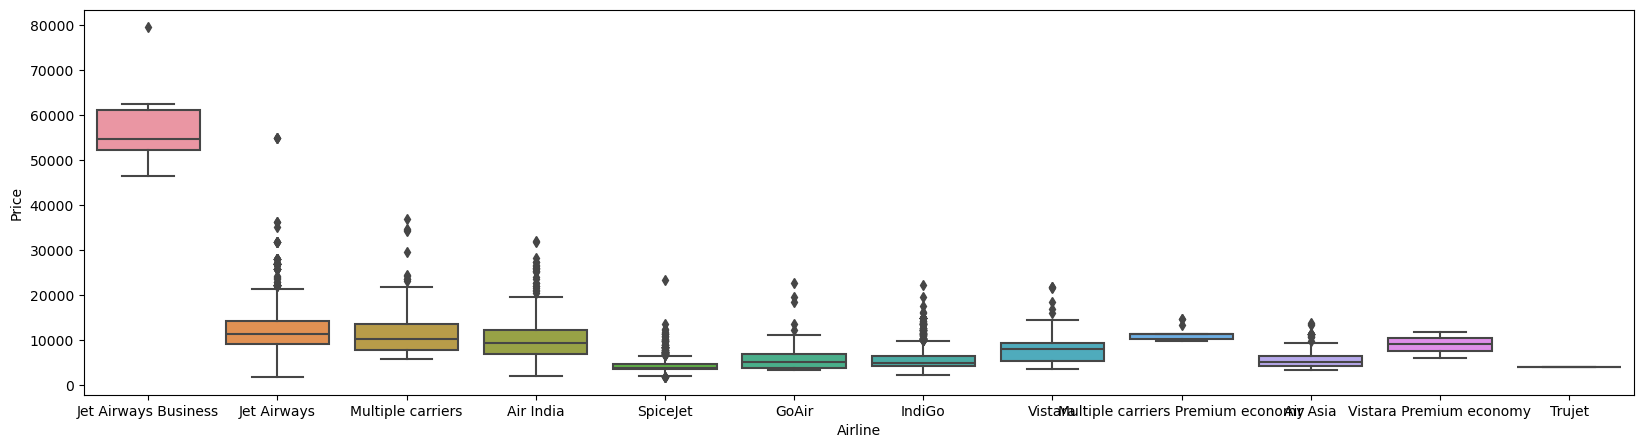

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))

### Variation between Total_Stops and Price

<Axes: xlabel='Total_Stops', ylabel='Price'>

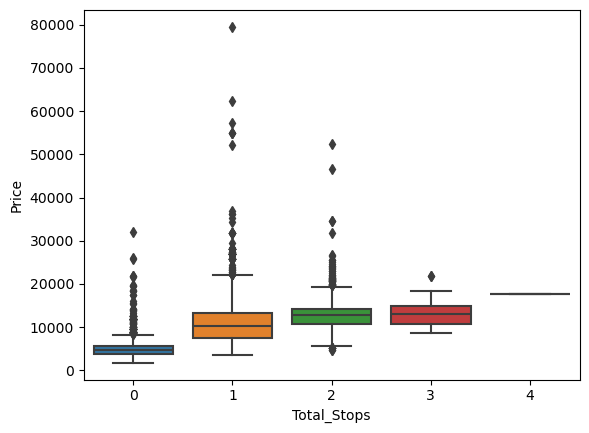

In [105]:
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

### Truth table for Airline 

In [107]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [109]:
Airline=pd.get_dummies(cat_data['Airline'],drop_first=True,dtype=int)

In [111]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Truth table for Source 

In [113]:
cat_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [115]:
Source = pd.get_dummies(cat_data['Source'],drop_first=True,dtype=int)

In [117]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Truth table for Destination

In [119]:
cat_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [121]:
Destination = pd.get_dummies(cat_data['Destination'],drop_first=True,dtype=int)

In [123]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Manuplation of Route

In [125]:
cat_data['Route'].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [127]:
cat_data['route_1'] = cat_data['Route'].str.split('?').str[0]

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3975553361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['route_1'] = cat_data['Route'].str.split('?').str[0]


In [129]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,BLR
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,DEL
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,CCU
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,BLR


In [131]:
cat_data['route_2'] = cat_data['Route'].str.split('?').str[1]
cat_data['route_3'] = cat_data['Route'].str.split('?').str[2]
cat_data['route_4'] = cat_data['Route'].str.split('?').str[3]
cat_data['route_5'] = cat_data['Route'].str.split('?').str[4]
cat_data['route_6'] = cat_data['Route'].str.split('?').str[5]

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\2439039662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['route_2'] = cat_data['Route'].str.split('?').str[1]
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\2439039662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['route_3'] = cat_data['Route'].str.split('?').str[2]
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\2439039662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [133]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,BLR,NAG,DEL,NaN,NaN,NaN


### Handling the Null values

In [135]:
cat_data.isna().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Additional_Info        0
route_1                0
route_2                0
route_3             3491
route_4             9116
route_5            10636
route_6            10681
dtype: int64

In [137]:
for i in ['route_3','route_4','route_5','route_6']:
    cat_data[i].fillna('None',inplace=True)

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\550579951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_data[i].fillna('None',inplace=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\550579951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i].fillna('None',inplace=True)


In [139]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1,route_2,route_3,route_4,route_5,route_6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,BLR,NAG,DEL,None,None,None


### Dropping cat_data columns

In [141]:
cat_data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [143]:
for i in ['Additional_Info','Route','route_6']:
    drop_column(cat_data,i)

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3026292429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(column,axis=1,inplace=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3026292429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(column,axis=1,inplace=True)
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\3026292429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(column,axis

In [145]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR,NAG,DEL,None,None


### Label Encoder for preprocessing

In [147]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le = LabelEncoder()

In [151]:
for i in ['route_1','route_2','route_3','route_4','route_5']:
    cat_data[i]=le.fit_transform(cat_data[i])

C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\632845197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]=le.fit_transform(cat_data[i])
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\632845197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]=le.fit_transform(cat_data[i])
C:\Users\Johnson\AppData\Local\Temp\ipykernel_5148\632845197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [153]:
cat_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,34,8,13,5


### Concatination of all the datas into new_data

In [155]:
new_data = pd.concat([cat_data,Source,Airline,Destination,con_data],axis=1)

In [157]:
new_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,...,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,1,...,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,0,0,...,1,13302,1,3,16,50,21,35,4,45


In [160]:
pd.options.display.max_columns=40
new_data.head()

,Airline,Source,Destination,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [162]:
for i in ['Airline','Source','Destination']:
    drop_column(new_data,i)

In [165]:
new_data.head()

,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,2,34,3,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,34,8,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [167]:
new_data.dtypes

route_1                              int32
route_2                              int32
route_3                              int32
route_4                              int32
route_5                              int32
Chennai                              int32
Delhi                                int32
Kolkata                              int32
Mumbai                               int32
Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Trujet                               int32
Vistara                              int32
Vistara Premium economy              int32
Cochin                               int32
Delhi                                int32
Hyderabad                            int32
Kolkata    

### Handling Outliers

In [170]:
def plotting(df,column):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.histplot(df[column],ax=ax1)
    sns.boxplot(df[column],ax=ax2)

D:\Ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


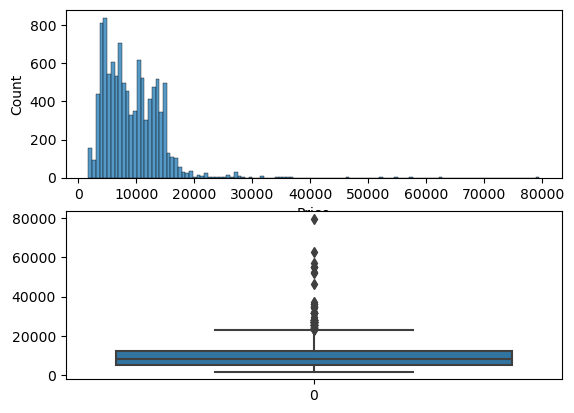

In [172]:
plotting(new_data,'Price')

In [175]:
new_data['Price']=np.where(new_data['Price']>=40000,new_data['Price'].median(),new_data['Price'])

D:\Ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


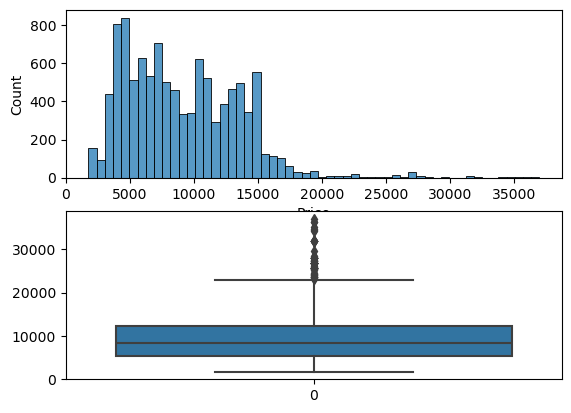

In [177]:
plotting(new_data,'Price')

### mutual_info_classif

In [179]:
y = new_data['Price']

In [181]:
X = new_data.drop('Price',axis=1)

In [183]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10682, dtype: float64

In [185]:
X

,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,2,34,3,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,34,8,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2,5,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,19,55,22,25,2,30
10678,2,5,29,13,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10679,0,13,29,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,27,4,8,20,11,20,3,0
10680,0,13,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,3,11,30,14,10,2,40


In [187]:
from sklearn.feature_selection import mutual_info_classif

In [189]:
imp_df = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [190]:
imp_df

,0
route_1,2.365896
route_2,2.969874
route_3,2.542851
route_4,1.723745
route_5,1.441213
Chennai,0.175971
Delhi,1.387921
Kolkata,0.817421
Mumbai,0.290603
Air India,0.685696


In [195]:
imp_df.columns=['Importance']

In [197]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
route_2,2.969874
route_3,2.542851
route_1,2.365896
Total_Stops,1.890916
Arrival_Time_hr,1.886123
Duration_hr,1.763991
route_4,1.723745
Journey_month,1.680653
Arrival_Time_min,1.602093
Dep_Time_hr,1.518962


### Machine Learning Algorithms

In [199]:
from sklearn.model_selection import train_test_split

In [201]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [203]:
X_train

,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
736,2,5,29,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6,22,20,0,40,2,20
1380,2,2,4,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,15,5,12,0,7,55,19,55
8120,3,33,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,6,7,15,12,30,5,15
7250,3,7,6,13,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,24,6,13,0,19,15,6,15
2111,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,21,3,9,0,21,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,15,6,7,5,21,0,13,55
3050,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,12,6,7,30,19,15,11,45
9070,2,14,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,24,5,20,20,23,25,27,5
5269,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,10,0,19,0,9,0


In [205]:
X_test

,route_1,route_2,route_3,route_4,route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_date,Journey_month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
8719,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,21,3,11,30,18,50,7,20
5536,3,33,6,13,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,21,3,12,30,9,25,20,55
8553,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,4,14,25,16,55,2,30
5487,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,9,3,6,50,19,45,12,55
4372,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,24,6,14,0,19,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,3,28,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,18,5,19,30,4,25,8,55
8213,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,18,5,19,15,4,25,9,10
5628,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,24,6,8,0,19,0,11,0
2453,2,5,29,13,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,18,3,17,15,19,45,2,30


In [207]:
pd.DataFrame(y_train)

,Price
736,3873.0
1380,9941.0
8120,6582.0
7250,8372.0
2111,6883.0
...,...
7022,13587.0
3050,7354.0
9070,9345.0
5269,12717.0


In [209]:
from sklearn import metrics

In [211]:
def algorithm(ml_model):
    model = ml_model.fit(X_train,y_train)
    print(f'''Training Score{model.score(X_train,y_train)}''')
    y_perd = model.predict(X_test)
    print(y_perd)
    r2=metrics.r2_score(y_test,y_perd)
    print('mae :',metrics.mean_absolute_error(y_test,y_perd))
    print('mse :',metrics.mean_squared_error(y_test,y_perd))
    print('R2 Score :',r2)
    sns.displot(y_test-y_perd)
    return y_perd

In [213]:
from sklearn.ensemble import RandomForestRegressor

Training Score0.9527979660498621
[12127.78        6581.51        4972.03       ... 14675.245
  3970.25766667  3866.08266667]
mae : 1122.534299724297
mse : 3298386.937607837
R2 Score : 0.8239934447952133


D:\Ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


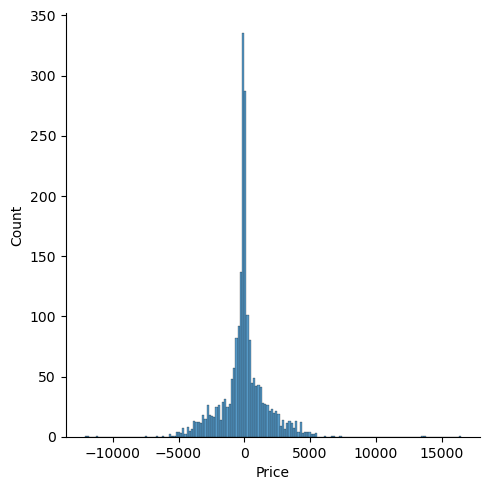

In [214]:
new_y = algorithm(RandomForestRegressor())

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
algorithm(RandomForestClassifier())

MemoryError: could not allocate 110952448 bytes